In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0


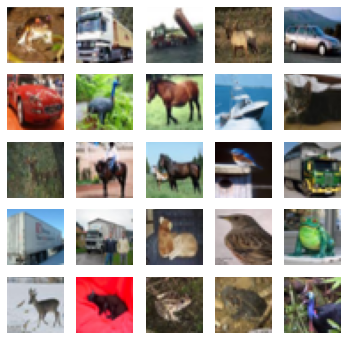

In [ ]:
plt.figure(figsize=(6,6))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')

plt.show()

In [ ]:
x_train = x_train.reshape(-1,32,32,3)
x_test = x_test.reshape(-1,32,32,3)

print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


# Padding same

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3),activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3),activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

cnn.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 8, 8, 64)         

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
from datetime import datetime

start_time = datetime.now()

hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=50, validation_data=(x_test, y_test))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/50
391/391 [==============================] - 101s 256ms/step - loss: 1.5639 - accuracy: 0.4417 - val_loss: 1.2811 - val_accuracy: 0.5384
Epoch 2/50
391/391 [==============================] - 98s 250ms/step - loss: 1.1682 - accuracy: 0.5904 - val_loss: 1.0656 - val_accuracy: 0.6271
Epoch 3/50
391/391 [==============================] - 98s 250ms/step - loss: 1.0081 - accuracy: 0.6503 - val_loss: 0.9596 - val_accuracy: 0.6670
Epoch 4/50
391/391 [==============================] - 98s 251ms/step - loss: 0.9008 - accuracy: 0.6907 - val_loss: 0.9790 - val_accuracy: 0.6582
Epoch 5/50
391/391 [==============================] - 98s 251ms/step - loss: 0.8293 - accuracy: 0.7126 - val_loss: 0.9459 - val_accuracy: 0.6732
Epoch 6/50
391/391 [==============================] - 100s 256ms/step - loss: 0.7622 - accuracy: 0.7384 - val_loss: 0.8320 - val_accuracy: 0.7158
Epoch 7/50
391/391 [==============================] - 98s 251ms/step - loss: 0.7058 - accuracy: 0.7570 - val_loss: 0.8094 - val_

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7238 - accuracy: 0.7868


[0.7238320112228394, 0.7868000268936157]

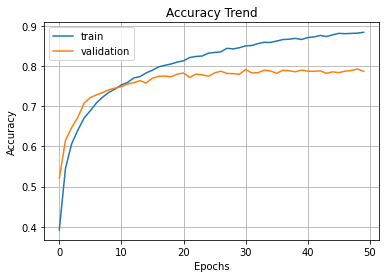

In [ ]:
plt.title('Accuracy Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.legend(loc='best')
plt.show()

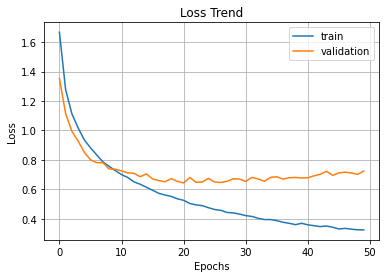

In [ ]:
plt.title('Loss Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend(loc='best')
plt.show()

# Padding valid

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

cnn.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 6, 6, 64)         

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
from datetime import datetime

start_time = datetime.now()

hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=50, validation_data=(x_test, y_test))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/50
391/391 [==============================] - 7s 15ms/step - loss: 1.7941 - accuracy: 0.3333 - val_loss: 1.5879 - val_accuracy: 0.4231
Epoch 2/50
391/391 [==============================] - 5s 13ms/step - loss: 1.4051 - accuracy: 0.4903 - val_loss: 1.2411 - val_accuracy: 0.5624
Epoch 3/50
391/391 [==============================] - 5s 13ms/step - loss: 1.2526 - accuracy: 0.5548 - val_loss: 1.1250 - val_accuracy: 0.6099
Epoch 4/50
391/391 [==============================] - 5s 14ms/step - loss: 1.1404 - accuracy: 0.5966 - val_loss: 1.0290 - val_accuracy: 0.6396
Epoch 5/50
391/391 [==============================] - 5s 13ms/step - loss: 1.0688 - accuracy: 0.6221 - val_loss: 1.0242 - val_accuracy: 0.6418
Epoch 6/50
391/391 [==============================] - 5s 14ms/step - loss: 1.0174 - accuracy: 0.6408 - val_loss: 0.9264 - val_accuracy: 0.6717
Epoch 7/50
391/391 [==============================] - 5s 14ms/step - loss: 0.9719 - accuracy: 0.6585 - val_loss: 0.9093 - val_accuracy: 0.6827

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6550 - accuracy: 0.7728


[0.6549638509750366, 0.7728000283241272]

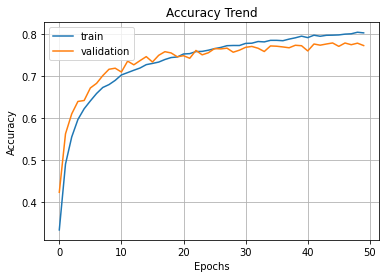

In [ ]:
plt.title('Accuracy Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.legend(loc='best')
plt.show()

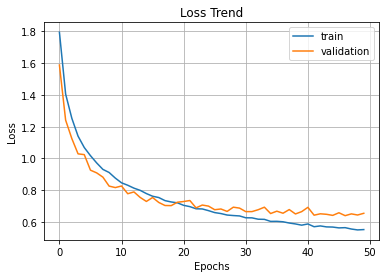

In [ ]:
plt.title('Loss Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend(loc='best')
plt.show()